<a href="https://colab.research.google.com/github/753x/StudyLibrary/blob/main/DeepLearning/Chapter_6-4~5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **6.4 바른 학습을 위해**

기계학습에서는 **오버피팅**이 문제가 되는 일이 많음

> **오버피팅** : 신경망이 훈련 데이터에만 지나치게 적응되어 그외에 데이터에는 제대로 대응하지 못하는 상태

##**6.4.1 오버피팅**

오버피팅이 일어나는 경우


*   매개변수가 많고 표현력이 높은 모델
*   훈련 데이터가 적음



In [8]:
# coding: utf-8
import os
import sys

sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import matplotlib.pyplot as plt
from content.sample_data.mnist import load_mnist
from content.sample_data.multi_layer_net import MultiLayerNet
from content.sample_data.optimizer import SGD


In [9]:
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 오버피팅을 재현하기 위해 학습 데이터 수를 줄임
x_train = x_train[:300]
t_train = t_train[:300]

Done
Done
Done
Done
Converting train-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting train-labels-idx1-ubyte.gz to NumPy Array ...
Done
Converting t10k-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting t10k-labels-idx1-ubyte.gz to NumPy Array ...
Done
Creating pickle file ...
Done!


In [ ]:
# weight decay（가중치 감쇠） 설정 =======================
weight_decay_lambda = 0 # weight decay를 사용하지 않을 경우
#weight_decay_lambda = 0.1
# ====================================================

network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10,
                        weight_decay_lambda=weight_decay_lambda)
optimizer = SGD(lr=0.01) # 학습률이 0.01인 SGD로 매개변수 갱신

max_epochs = 201
train_size = x_train.shape[0]
batch_size = 100

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)
epoch_cnt = 0

for i in range(1000000000):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    grads = network.gradient(x_batch, t_batch)
    optimizer.update(network.params, grads)

    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)

        print("epoch:" + str(epoch_cnt) + ", train acc:" + str(train_acc) + ", test acc:" + str(test_acc))

        epoch_cnt += 1
        if epoch_cnt >= max_epochs:
            break

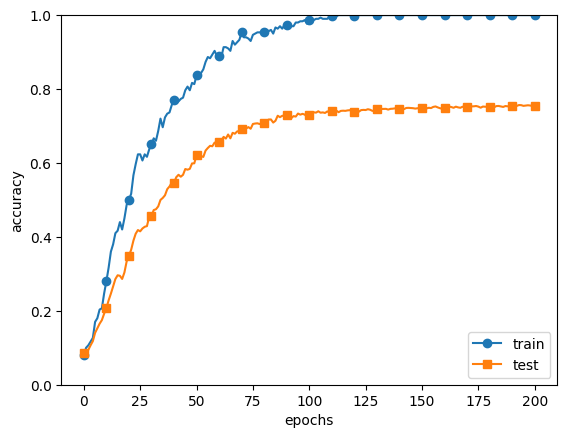

In [13]:
markers = {'train': 'o', 'test': 's'}
x = np.arange(max_epochs)
plt.plot(x, train_acc_list, marker='o', label='train', markevery=10)
plt.plot(x, test_acc_list, marker='s', label='test', markevery=10)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

> 훈련 데이터의 acc : 100%

> 시험 데이터의 acc : 75%

훈련 데이터에만 적응 해버렸다고 할 수 있음

## **6.4.2 가중치 감소**

**가중치 감소** : 학습 과정에서 큰 가중치에 대해서는 그에 상응하는 큰 페널티를 부과하여 오버피팅을 억제

> **Why?** 오버피팅은 가중치 매개변수의 값이 커서 발생하는 경우가 많기 때문

> **How?** 가중치의 제곱 노름(L2 노름)을 손실 함수에 더함

가중치를 **W**라 하면 L2 노름에 따른 가중치 감소는 $1\over2$λ**W**$^2$이 되고 이 $1\over2$λ**W**$^2$을 손실 함수에 더함

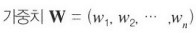

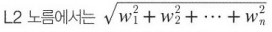

> λ = 0.1로 가중치 감소를 적용한다면

In [ ]:
# weight decay（가중치 감쇠） 설정 =======================
#weight_decay_lambda = 0 # weight decay를 사용하지 않을 경우
weight_decay_lambda = 0.1
# ====================================================

network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10,
                        weight_decay_lambda=weight_decay_lambda)
optimizer = SGD(lr=0.01) # 학습률이 0.01인 SGD로 매개변수 갱신

max_epochs = 201
train_size = x_train.shape[0]
batch_size = 100

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)
epoch_cnt = 0

for i in range(1000000000):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    grads = network.gradient(x_batch, t_batch)
    optimizer.update(network.params, grads)

    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)

        print("epoch:" + str(epoch_cnt) + ", train acc:" + str(train_acc) + ", test acc:" + str(test_acc))

        epoch_cnt += 1
        if epoch_cnt >= max_epochs:
            break

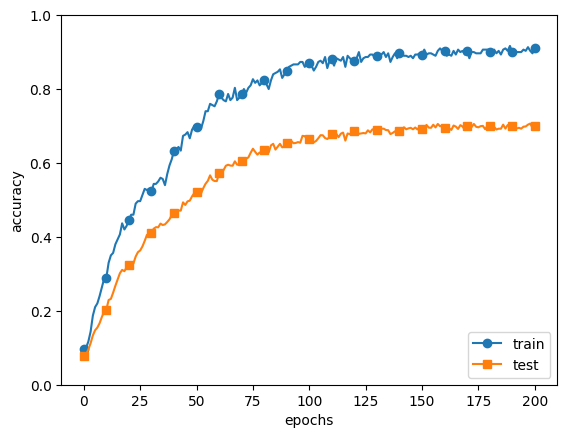

In [15]:
markers = {'train': 'o', 'test': 's'}
x = np.arange(max_epochs)
plt.plot(x, train_acc_list, marker='o', label='train', markevery=10)
plt.plot(x, test_acc_list, marker='s', label='test', markevery=10)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

> 훈련 데이터의 acc : 80%

> 시험 데이터의 acc : 61%

**여전히 차이가 있긴 하지만 가중치 감소를 이용하지 않은 것과 비교하면 그 차이가 줄어듦**

## **6.4.3 드롭아웃**

> 가중치 감소는 간단하게 구현할 수 있고 어느 정도 지나친 학습을 억제할 수 있음

> **BUT** 신경망 모델이 복잡해지면 가중치 감소만으로는 대응하기 어려워짐

**드롭아웃** : 뉴런을 임의로 삭제하면서 학습하는 방법

> 훈련 때 은닉층의 뉴런을 무작위로 골라 삭제

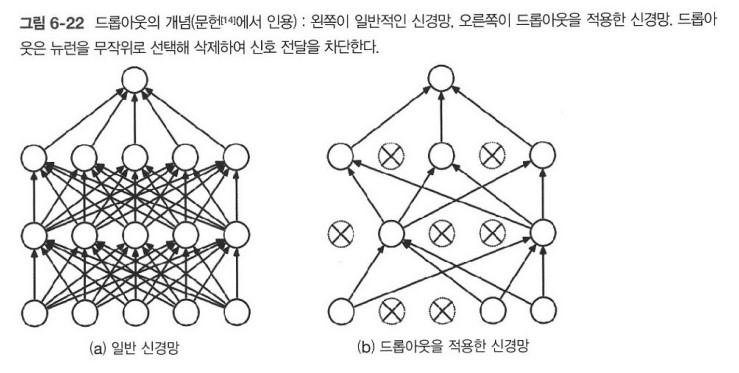

In [16]:
class Dropout:
  def __init__(self, dropout_ratio = 0.5):
    self.dropout_ratio = dropout_ratio
    self.mask = None

  def forward(self, x, train_flg = True):
    if train_flg:
      self.mask = np.random.rand(*x.shape) > self.dropout_ratio
      return x * self.mask
    else:
      return x * ( 1.0 - self.dropout_ratio)

  def backward(self, dout):
    return dout * self.mask

> **핵심** : 훈련 시에는 순전파 때마다 self.mask에 삭제할 뉴런을 False로 표시한다는 것

In [21]:
# coding: utf-8
import os
import sys
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import matplotlib.pyplot as plt
from content.sample_data.mnist import load_mnist
from content.sample_data.multi_layer_net_extend import MultiLayerNetExtend
from content.sample_data.trainer import Trainer

In [23]:
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 오버피팅을 재현하기 위해 학습 데이터 수를 줄임
x_train = x_train[:300]
t_train = t_train[:300]

**드롭아웃을 사용하지 않았을 경우**

In [ ]:
# 드롭아웃 사용 유무와 비울 설정 ========================
use_dropout = False  # 드롭아웃을 쓰지 않을 때는 False
dropout_ratio = 0.2
# ====================================================

network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100],
                              output_size=10, use_dropout=use_dropout, dropout_ration=dropout_ratio)
trainer = Trainer(network, x_train, t_train, x_test, t_test,
                  epochs=301, mini_batch_size=100,
                  optimizer='sgd', optimizer_param={'lr': 0.01}, verbose=True)
trainer.train()

train_acc_list, test_acc_list = trainer.train_acc_list, trainer.test_acc_list

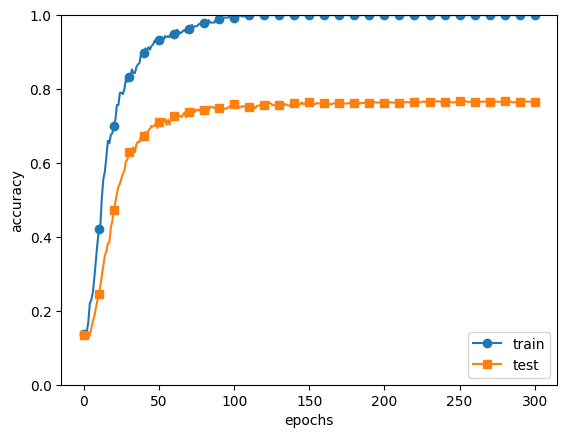

In [25]:
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, marker='o', label='train', markevery=10)
plt.plot(x, test_acc_list, marker='s', label='test', markevery=10)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

> 훈련 데이터 : 100%

> 시험 데이터 : 76%

**드롭아웃을 사용한 경우**

In [ ]:
# 드롭아웃 사용 유무와 비울 설정 ========================
use_dropout = True  # 드롭아웃을 쓰지 않을 때는 False
dropout_ratio = 0.2
# ====================================================

network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100],
                              output_size=10, use_dropout=use_dropout, dropout_ration=dropout_ratio)
trainer = Trainer(network, x_train, t_train, x_test, t_test,
                  epochs=301, mini_batch_size=100,
                  optimizer='sgd', optimizer_param={'lr': 0.01}, verbose=True)
trainer.train()

train_acc_list, test_acc_list = trainer.train_acc_list, trainer.test_acc_list

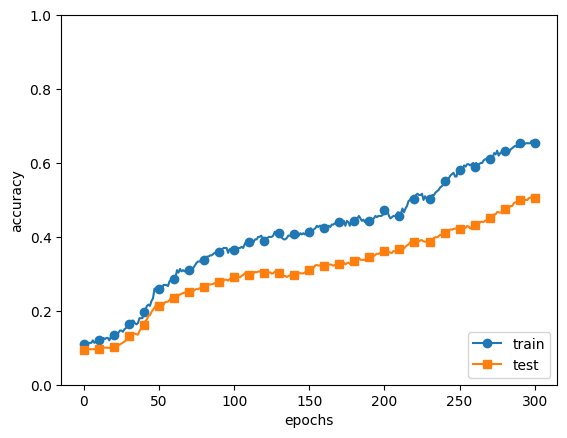

In [27]:
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, marker='o', label='train', markevery=10)
plt.plot(x, test_acc_list, marker='s', label='test', markevery=10)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

> 훈련 데이터 : 65%

> 시험 데이터 : 50%

# **6.5 적절한 하이퍼파라미터 값 찾기**

## **6.5.1 검증 데이터**

>훈련 데이터 : 학습

>시험 데이터 : 범용 성능 평가

2개를 통해 오버피팅한 건 아닌지, 범용 성능은 어느 정도인지 같은 것들을 평가

하이퍼파라미터를 다양한 값으로 설정 및 검증 할 때
**주의사항** : 파라미터 성능을 평가할 때는 시험 데이터를 사용해서는 안 됨

> **Why?** 시험 데이터를 사용하여 하이퍼파라미터를 조정하면 파라미터 값이 시험 데이터에 오버피팅되기 때문

> 그렇기에 조정을 위해서는 파라미터 전용 확인 데이터가 필요

> **검증데이터**(validation data)



*   훈련 데이터 : 매개변수 학습
*   검증 데이터 : 하이퍼파라미터 성능 평가
*   시험 데이터 : 신경망의 범용 성능 평가



## **6.5.2 하이퍼파라미터 최적화**

**핵심** : '최적 값'이 존재하는 범위를 조금씩 줄여간다는 것

> 범위를 줄이기 위해선 대략적인 범위 설정 후 범위에서 무작위로 파라미터 값을 골라낸 후(샘플링), 그 값으로 정확도 평가(그리드 서치 같은 규칙적인 탐색이 아님)

범위는 '대략적으로' 지정하는 것이 **효과적**

0.001~1,000사이 같이 **'10의 거듭제곱'**단위로 범위 지정. 이것을 **'로그 스케일'**로 지정한다고 함

파라미터 최적화는 딥러닝 학습에서 오랜 시간이 걸림

그렇기에 나쁜 값은 일찍 포기해야 함

즉 학습을 위한 에폭(epoch)을 작게 해, 1회 평가에 걸리는 시간을 단축



*   **0단계**

> 하이퍼파라미터 값의 범위를 설정함

*   **1단계**

> 설정된 범위에서 하이퍼파라미터의 값을 무작위로 추출함.

*  **2단계**

> 1단계에서 샘플링한 하이퍼파라미터 값을 사용하여 학습하고, 검증 데이터로 정확도를 평가함(단, 에폭은 작게 설정)

*  **3단계**

> 1단계와 2단계를 특정 횟수(100회 등)반복하며, 그 정확도의 결과를 보고 하이퍼파라미터의 범위를 좁힘



**베이즈 최적화** : 베이즈 정리를 중심으로 한 수학이론을 구사하여 효율적으로 최적화를 수행함.

## **6.5.3 하이퍼파라미터 최적화 구현하기**

In [28]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import matplotlib.pyplot as plt
from content.sample_data.mnist import load_mnist
from content.sample_data.multi_layer_net import MultiLayerNet
from content.sample_data.util import shuffle_dataset
from content.sample_data.trainer import Trainer

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 결과를 빠르게 얻기 위해 훈련 데이터를 줄임
x_train = x_train[:500]
t_train = t_train[:500]

# 20%를 검증 데이터로 분할
validation_rate = 0.20
validation_num = int(x_train.shape[0] * validation_rate)
x_train, t_train = shuffle_dataset(x_train, t_train)
x_val = x_train[:validation_num]
t_val = t_train[:validation_num]
x_train = x_train[validation_num:]
t_train = t_train[validation_num:]

In [29]:
def __train(lr, weight_decay, epocs=50):
    network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100],
                            output_size=10, weight_decay_lambda=weight_decay)
    trainer = Trainer(network, x_train, t_train, x_val, t_val,
                      epochs=epocs, mini_batch_size=100,
                      optimizer='sgd', optimizer_param={'lr': lr}, verbose=False)
    trainer.train()

    return trainer.test_acc_list, trainer.train_acc_list

In [30]:
# 하이퍼파라미터 무작위 탐색======================================
optimization_trial = 100
results_val = {}
results_train = {}
for _ in range(optimization_trial):
    # 탐색한 하이퍼파라미터의 범위 지정===============
    weight_decay = 10 ** np.random.uniform(-8, -4)
    lr = 10 ** np.random.uniform(-6, -2)
    # ================================================

    val_acc_list, train_acc_list = __train(lr, weight_decay)
    print("val acc:" + str(val_acc_list[-1]) + " | lr:" + str(lr) + ", weight decay:" + str(weight_decay))
    key = "lr:" + str(lr) + ", weight decay:" + str(weight_decay)
    results_val[key] = val_acc_list
    results_train[key] = train_acc_list

val acc:0.09 | lr:8.642659759525859e-06, weight decay:2.1920396565550777e-07
val acc:0.21 | lr:0.00079400979913067, weight decay:7.304584892736475e-07
val acc:0.15 | lr:8.635840831961247e-06, weight decay:4.206671883636318e-05
val acc:0.13 | lr:1.3598008710519964e-06, weight decay:9.920595516835046e-05
val acc:0.05 | lr:8.548410938778684e-06, weight decay:1.2816538194604726e-05
val acc:0.11 | lr:2.2695173885689863e-05, weight decay:7.41081570480394e-06
val acc:0.36 | lr:0.0017854041430992236, weight decay:7.298304344012329e-06
val acc:0.08 | lr:7.68291648814655e-05, weight decay:4.233656071515169e-06
val acc:0.17 | lr:0.0006176052377536166, weight decay:4.388681738916809e-05
val acc:0.73 | lr:0.00917711792878069, weight decay:2.778176452598545e-07
val acc:0.07 | lr:4.327520969508484e-05, weight decay:1.8744242134871185e-06
val acc:0.18 | lr:3.663456602350264e-05, weight decay:1.6302185102273447e-07
val acc:0.22 | lr:0.0002526102512811901, weight decay:1.965848355115442e-06
val acc:0.53

=========== Hyper-Parameter Optimization Result ===========
Best-1(val acc:0.84) | lr:0.009657467772904653, weight decay:2.713146727047301e-06
Best-2(val acc:0.79) | lr:0.009873648827250099, weight decay:3.611745032966366e-05
Best-3(val acc:0.75) | lr:0.005745727376304477, weight decay:1.1267206735109705e-08
Best-4(val acc:0.73) | lr:0.00917711792878069, weight decay:2.778176452598545e-07
Best-5(val acc:0.73) | lr:0.005087339595977516, weight decay:1.5791391550142805e-05
Best-6(val acc:0.72) | lr:0.004913959038892015, weight decay:8.633977193503351e-05
Best-7(val acc:0.68) | lr:0.005155446341262046, weight decay:5.274181571409237e-06
Best-8(val acc:0.6) | lr:0.003736573234585913, weight decay:9.743941557371373e-05
Best-9(val acc:0.6) | lr:0.00358820089533581, weight decay:1.94336333987339e-08
Best-10(val acc:0.53) | lr:0.0024452178225703707, weight decay:2.2198814222868016e-08
Best-11(val acc:0.51) | lr:0.004161533109292877, weight decay:3.20621017099156e-08
Best-12(val acc:0.49) | lr:

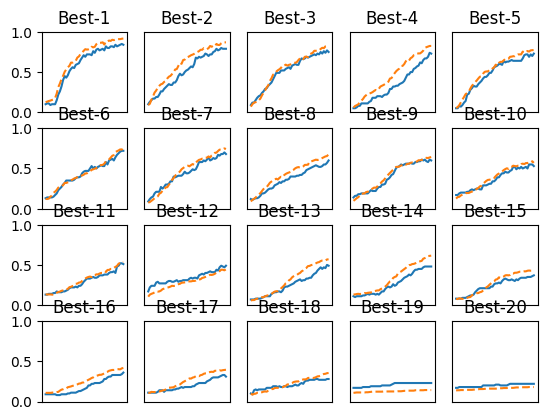

In [31]:
# 그래프 그리기========================================================
print("=========== Hyper-Parameter Optimization Result ===========")
graph_draw_num = 20
col_num = 5
row_num = int(np.ceil(graph_draw_num / col_num))
i = 0

for key, val_acc_list in sorted(results_val.items(), key=lambda x:x[1][-1], reverse=True):
    print("Best-" + str(i+1) + "(val acc:" + str(val_acc_list[-1]) + ") | " + key)

    plt.subplot(row_num, col_num, i+1)
    plt.title("Best-" + str(i+1))
    plt.ylim(0.0, 1.0)
    if i % 5: plt.yticks([])
    plt.xticks([])
    x = np.arange(len(val_acc_list))
    plt.plot(x, val_acc_list)
    plt.plot(x, results_train[key], "--")
    i += 1

    if i >= graph_draw_num:
        break

plt.show()


Best-1 ~ Best-5

* 학습률은 0.001~0.01

* 가중치 감소 계수는 10$^{-8}$~10$^{-6}$

잘될 것 같은 값의 범위를 관찰 후 범위를 좁혀감 그 후에 축소된 범위로 똑같은 작업을 반복